# Additional Analysis for Blog
### Alex Bass
### 15 August 2022

In [45]:
import pandas as pd
import numpy as np
import pymc3 as pm
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("/Users/alex/Library/CloudStorage/OneDrive-Personal/DS6040/Project - School Shootings/") # setting project directory

In [46]:
data = pd.read_csv("webscraping/data_w_county_match_manual.csv")
data["Date"] = pd.to_datetime(data.Date.values) # converting values to DateTime
data.head()

,Unnamed: 0,X.1,X,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,countyFIPS,CountyName
0,1,1,600,20081023ALPRP,http://www.wsfa.com/story/9234390/wsfa-12-news...,NaN,NaN,2,2008-10-23,Fall,...,No,No,No,Yes,No,No,1,NaN,1001,Autauga County
1,2,2,1979,20220319ALCEL,https://www.al.com/news/2022/03/robertsdale-po...,5,Regional,4,2022-03-19,Spring,...,No,No,No,No,No,No,99,No,1003,Baldwin County
2,3,3,140,20190322ALBLB,http://www.wbrc.com/2019/03/22/bloutsville-ele...,NaN,NaN,4,2019-03-22,Spring,...,No,No,No,No,No,No,1,No,1009,Blount County
3,4,4,679,20060831ALOXO,https://www.newspapers.com/image/106551825/?te...,NaN,NaN,2,2006-08-31,Summer,...,No,No,No,No,No,No,<10,NaN,1015,Calhoun County
4,5,5,1418,19781017ALLAL,https://www.newspapers.com/newspage/107532734/,NaN,NaN,2,1978-10-17,Fall,...,No,No,No,No,No,No,2,NaN,1017,Chambers County


In [47]:
data.columns

Index(['Unnamed: 0', 'X.1', 'X', 'Incident_ID', 'Sources', 'Number_News',
       'Media_Attention', 'Reliability', 'Date', 'Quarter', 'School', 'City',
       'State', 'School_Level', 'Location', 'Location_Type', 'During_School',
       'Time_Period', 'First_Shot', 'Summary', 'Narrative', 'Situation',
       'Targets', 'Accomplice', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Preplanned',
       'Shots_Fired', 'Active_Shooter_FBI', 'countyFIPS', 'CountyName'],
      dtype='object')

In [48]:
data["Year"] = data.Date.dt.year

In [49]:
plot_dta_1 = data.Year.value_counts().sort_index()
data.School_Level.value_counts()

#recoding school variable
old = ["High", "Elementary", "Middle", "Junior High", "K-8", "Other", "K-12", "12-Jun", "Unknown"]
new = ["High", "Elementary", "Middle", "Middle", "Elementary", "Other", "Other", "High", "Other"]
lvls = ['Elementary', "Middle", "High", "Other"]
data["School_Level"] = pd.Categorical(data.School_Level.replace(old, new), lvls, ordered=True)

plot_dta_2 = data.groupby(["Year", "School_Level"]).size()\
    .reset_index()\
    .rename(columns={0:'N'})\
    .query('School_Level!="Other"')

plot_dta_2['School_Level'] = plot_dta_2.School_Level.cat.remove_unused_categories()


Text(0.5, 1.0, 'Reported Number of Gun Violence Incidents\n in Schools has Increased')

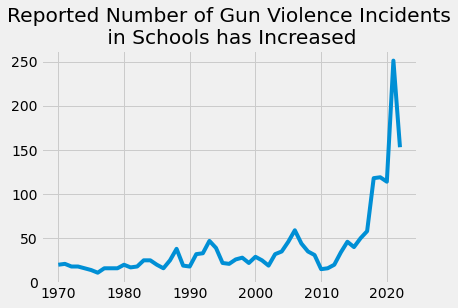

In [50]:
plt.style.use('fivethirtyeight')
sns.lineplot(x = plot_dta_1.index, y = plot_dta_1.values)
plt.title('Reported Number of Gun Violence Incidents\n in Schools has Increased')

Text(0.5, 1.0, 'Most Incidents Occur In High School \nor Elementary School')

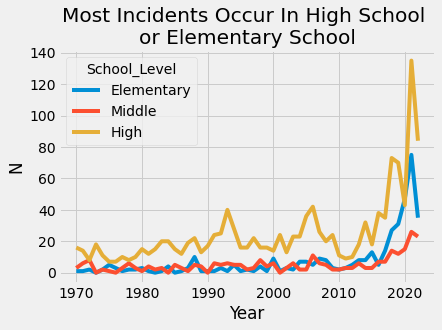

In [51]:
plt.style.use('fivethirtyeight')
sns.lineplot(x = plot_dta_2.Year, y = plot_dta_2.N, hue=plot_dta_2.School_Level)
plt.title('Most Incidents Occur In High School \nor Elementary School')

In [52]:
#some excel and messy data cleaning
plot_dta_3 = data.Shots_Fired.str.replace("<|>|\+", "")\
    .str.replace("Multiple", "3")\
    .str.replace("30-50", "40")\
    .str.replace("10-May", "7")\
    .str.replace("10-May", "7")\
    .str.replace("30-Oct", "20")\
    .str.replace("21-23", "22").fillna(1).astype('int')
    
#pretty right skewed so adding cap
plot_dta_3 = np.where(plot_dta_3>50, 50, plot_dta_3)

/var/folders/3n/g1rn_qsj40dd1cm5v67yyt100000gn/T/ipykernel_5051/2279823852.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_dta_3 = data.Shots_Fired.str.replace("<|>|\+", "")\


Text(0.8, -0.04, '*Missing values were given a 1')

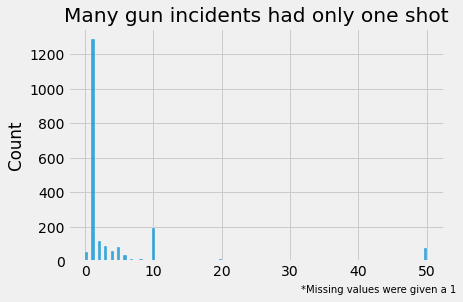

In [53]:
plt.style.use('fivethirtyeight')
sns.histplot(plot_dta_3)
plt.title('Many gun incidents had only one shot')
txt="*Missing values were given a 1"
plt.figtext(0.8, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=10)

In [54]:
data.Media_Attention.value_counts()

Local            503
Regional         107
National          99
International     23
Name: Media_Attention, dtype: int64

Text(0.9, -0.04, '*Many data were missing (>1000)')

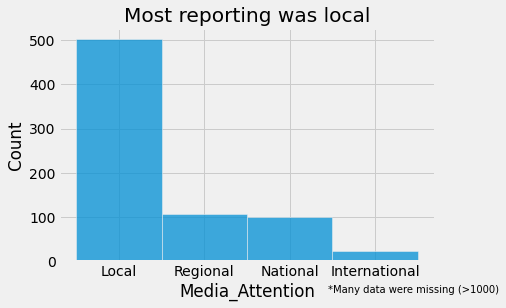

In [82]:
cat_type = pd.CategoricalDtype(categories=["Local", "Regional", "National", "International"], ordered=True)

plot_dta_4 = data.Media_Attention.astype(cat_type)

plt.style.use('fivethirtyeight')
sns.histplot(plot_dta_4)
plt.title('Most reporting was local')
txt="*Many data were missing (>1000)"
plt.figtext(0.9, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=10)

In [56]:
data["Shots_Fired"] = data.Shots_Fired.str.replace("<|>|\+", "")\
    .str.replace("Multiple", "3")\
    .str.replace("30-50", "40")\
    .str.replace("10-May", "7")\
    .str.replace("10-May", "7")\
    .str.replace("30-Oct", "20")\
    .str.replace("21-23", "22")\
    .astype("float")

/var/folders/3n/g1rn_qsj40dd1cm5v67yyt100000gn/T/ipykernel_5051/3882602454.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Shots_Fired"] = data.Shots_Fired.str.replace("<|>|\+", "")\


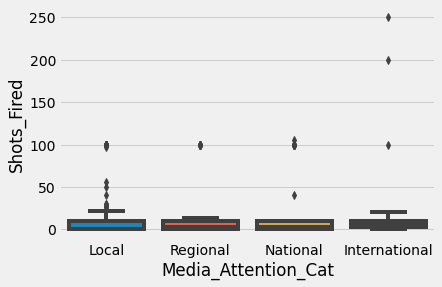

In [57]:
#average shots per group
data["Media_Attention_Cat"] = data.Media_Attention.astype(cat_type)

plt.style.use('fivethirtyeight')
ax = sns.boxplot(x="Media_Attention_Cat", y="Shots_Fired", data=data)

In [58]:
data.groupby("Media_Attention_Cat")["Shots_Fired"].agg(["mean", "count"])

,mean,count
Media_Attention_Cat,,
Local,16.937255,255
Regional,21.808824,68
National,25.770492,61
International,36.764706,17


Text(0.5, 1.0, 'Gun Incidents Highest in Fall')

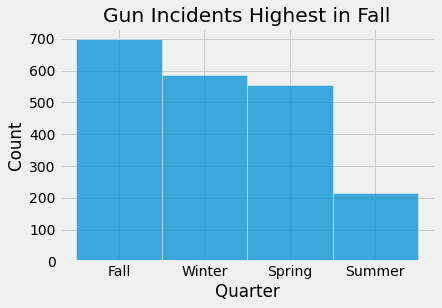

In [59]:
cat2_type = pd.CategoricalDtype(categories=["Fall", "Winter", "Spring", "Summer"], ordered=True)

plot_dta_5 = data.Quarter.astype(cat2_type)

plt.style.use('fivethirtyeight')
sns.histplot(plot_dta_5)
plt.title('Gun Incidents Highest in Fall')

In [76]:
# Doing a little joining to see region shootings over time
state_codes = pd.read_csv("county_level_data_raw/state_codes.csv")
region_match = pd.read_csv("county_level_data_raw/region_state_match.csv")

plot_dta_6 = data.set_index("State").join(state_codes.set_index("State")).reset_index()
plot_dta_6 = plot_dta_6.set_index("Name").join(region_match.set_index("State")).reset_index()

plot_dta_6 = plot_dta_6.groupby(['Year','Region'])['index'].agg('count')\
    .reset_index()\
    .rename(columns = {'index':'Count'}) #there is an index for every number i.e. no missing values

plot_dta_6.head()

,Year,Region,Count
0,1970,MIDWEST,6
1,1970,SOUTH,11
2,1970,WEST,3
3,1971,MIDWEST,3
4,1971,NORTHEAST,6


Text(0.5, 1.0, 'All Regions Rising\n But South And Midwest Most Sharply')

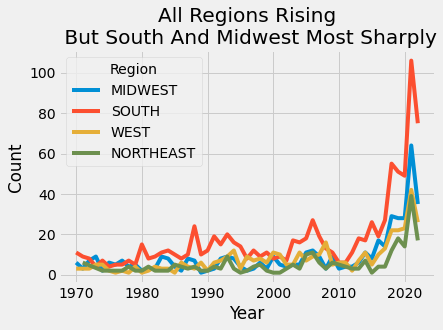

In [81]:
plt.style.use('fivethirtyeight')
sns.lineplot(x = plot_dta_6.Year, y = plot_dta_6.Count, hue=plot_dta_6.Region)
plt.title('All Regions Rising\n But South And Midwest Most Sharply')

### Steps for further analysis

1. Scrape the webpages of shootings and do some sort of text analysis (perhaps classify how vast the coverage is, scrape how many people died, something else?)
2. Could do a similar analysis on `Summary` column
3. Do certain counties/states report more over time? (Could look at this by region / also a good predictor variable perhaps)
4. Predict what incidents get coverage locally, regionally, nationally, internationally or just local vs. more coverage